# CNN

## Handwritten Digit Recognition Dataset - MNIST
- each image is 28 × 28 (784 pixels total)
- 60,000 images for training, 10,000 images for testing
- 10 digits to predict
- state-of-the-art prediction error is around 0.2%

### Loading the MNIST dataset

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is enabled with initial size: 90.0% of memory, cuDNN 5105)


In [2]:
#load the MNIST dtaset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

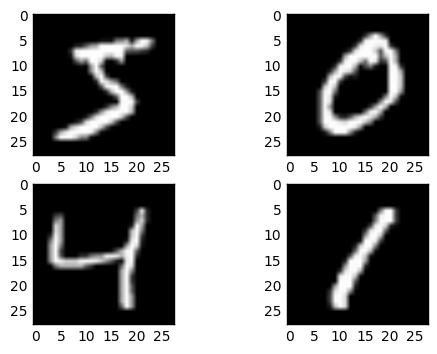

In [3]:
#plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1],cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2],cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3],cmap=plt.get_cmap('gray'))
#show the plot
plt.show()

### Baseline Model with MLP

In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [5]:
#fix random seed
seed = 7
np.random.seed(seed)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
#flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [8]:
#normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [9]:
#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [10]:
y_test.shape

(10000, 10)

In [11]:
#define baseline model: 784->[784]->10

In [12]:
def baseline_model():
    #create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, init='normal', activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [13]:
#build the model
model = baseline_model()
#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
0s - loss: 0.2790 - acc: 0.9203 - val_loss: 0.1423 - val_acc: 0.9579
Epoch 2/10
0s - loss: 0.1122 - acc: 0.9678 - val_loss: 0.0992 - val_acc: 0.9700
Epoch 3/10
0s - loss: 0.0723 - acc: 0.9791 - val_loss: 0.0786 - val_acc: 0.9747
Epoch 4/10
0s - loss: 0.0509 - acc: 0.9853 - val_loss: 0.0785 - val_acc: 0.9760
Epoch 5/10
0s - loss: 0.0365 - acc: 0.9898 - val_loss: 0.0630 - val_acc: 0.9793
Epoch 6/10
0s - loss: 0.0264 - acc: 0.9930 - val_loss: 0.0638 - val_acc: 0.9792
Epoch 7/10
0s - loss: 0.0184 - acc: 0.9957 - val_loss: 0.0609 - val_acc: 0.9803
Epoch 8/10
0s - loss: 0.0147 - acc: 0.9968 - val_loss: 0.0641 - val_acc: 0.9812
Epoch 9/10
0s - loss: 0.0108 - acc: 0.9979 - val_loss: 0.0590 - val_acc: 0.9818
Epoch 10/10
0s - loss: 0.0071 - acc: 0.9988 - val_loss: 0.0578 - val_acc: 0.9830


In [14]:
#evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.70%


### Simple CNN

In [15]:
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th') #change dim ordering to theano format

In [16]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [17]:
#normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

![title](img/CNN1.png)

In [18]:
def simplecnn():
    # create model
    model = Sequential()
    model.add(Convolution2D(32, 5, 5, input_shape=(1,28,28),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu'))
    model.add(Dense(num_classes, activation= 'softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [19]:
# build the model
model = simplecnn()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200,verbose=2)

/home/hui/.local/lib/python2.7/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/home/hui/.local/lib/python2.7/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/home/hui/.local/lib/python2.7/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
0s - loss: 0.2367 - acc: 0.9341 - val_loss: 0.0725 - val_acc: 0.9775
Epoch 2/10
0s - loss: 0.0729 - acc: 0.9782 - val_loss: 0.0519 - val_acc: 0.9824
Epoch 3/10
0s - loss: 0.0514 - acc: 0.9842 - val_loss: 0.0413 - val_acc: 0.9864
Epoch 4/10
0s - loss: 0.0399 - acc: 0.9880 - val_loss: 0.0462 - val_acc: 0.9850
Epoch 5/10
0s - loss: 0.0335 - acc: 0.9894 - val_loss: 0.0347 - val_acc: 0.9887
Epoch 6/10
0s - loss: 0.0279 - acc: 0.9910 - val_loss: 0.0315 - val_acc: 0.9890
Epoch 7/10
0s - loss: 0.0225 - acc: 0.9927 - val_loss: 0.0345 - val_acc: 0.9886
Epoch 8/10
0s - loss: 0.0198 - acc: 0.9936 - val_loss: 0.0309 - val_acc: 0.9892
Epoch 9/10
0s - loss: 0.0165 - acc: 0.9947 - val_loss: 0.0339 - val_acc: 0.9894
Epoch 10/10
1s - loss: 0.0144 - acc: 0.9953 - val_loss: 0.0308 - val_acc: 0.9903


In [20]:
#evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Simple CNN Error: %.2f%%" % (100-scores[1]*100))

Simple CNN Error: 0.97%


### Larger CNN
![title](img/CNN2.png)

In [21]:
def largecnn():
    # create model
    model = Sequential()
    model.add(Convolution2D(30, 5, 5, input_shape=(1, 28, 28), activation= 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, 3, 3, activation= 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation= 'softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [22]:
# build the model
model = largecnn()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200,verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
1s - loss: 0.3914 - acc: 0.8762 - val_loss: 0.0735 - val_acc: 0.9781
Epoch 2/10
1s - loss: 0.0938 - acc: 0.9708 - val_loss: 0.0522 - val_acc: 0.9823
Epoch 3/10
1s - loss: 0.0687 - acc: 0.9786 - val_loss: 0.0438 - val_acc: 0.9867
Epoch 4/10
1s - loss: 0.0566 - acc: 0.9822 - val_loss: 0.0321 - val_acc: 0.9890
Epoch 5/10
1s - loss: 0.0483 - acc: 0.9846 - val_loss: 0.0337 - val_acc: 0.9887
Epoch 6/10
1s - loss: 0.0417 - acc: 0.9871 - val_loss: 0.0329 - val_acc: 0.9893
Epoch 7/10
1s - loss: 0.0385 - acc: 0.9877 - val_loss: 0.0293 - val_acc: 0.9902
Epoch 8/10
1s - loss: 0.0348 - acc: 0.9889 - val_loss: 0.0249 - val_acc: 0.9922
Epoch 9/10
1s - loss: 0.0328 - acc: 0.9895 - val_loss: 0.0297 - val_acc: 0.9901
Epoch 10/10
1s - loss: 0.0288 - acc: 0.9909 - val_loss: 0.0266 - val_acc: 0.9913


In [23]:
#evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Larger CNN Error: %.2f%%" % (100-scores[1]*100))

Larger CNN Error: 0.87%


## Photograph Object Recognition Dataset - CIFAR-10
- 60,000 photos divided into 10 classes (airplanes, automobiles, birds, cats, etc.)
- 50,000 for training, 10,000 for testing
- RGB, 32 × 32 (1024 pixels)
- state-of-the-art accuracy is 96%, human accuracy is 94%

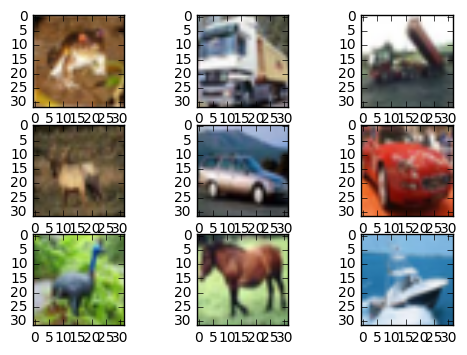

In [24]:
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(X_train[i]))
# show the plot
pyplot.show()

### Simple CNN
![title](img/CNN3.png)

In [25]:
from keras.optimizers import SGD
from keras.constraints import maxnorm

In [26]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [27]:
def simplecnn():
    # create model
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(3,32,32),activation='relu', W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Convolution2D(32,3,3,activation="relu",W_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation= 'relu',W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation= 'softmax'))
    # Compile model
    epoch = 25
    lrate = 0.01
    decay = lrate/epoch
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [28]:
# build the model
model = simplecnn()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=25, batch_size=32,verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
6s - loss: 1.5889 - acc: 0.4292 - val_loss: 1.3004 - val_acc: 0.5370
Epoch 2/25
6s - loss: 1.1694 - acc: 0.5832 - val_loss: 1.1382 - val_acc: 0.5934
Epoch 3/25
6s - loss: 0.9652 - acc: 0.6593 - val_loss: 1.0142 - val_acc: 0.6455
Epoch 4/25
6s - loss: 0.8036 - acc: 0.7187 - val_loss: 0.9664 - val_acc: 0.6640
Epoch 5/25
6s - loss: 0.6689 - acc: 0.7662 - val_loss: 0.9711 - val_acc: 0.6695
Epoch 6/25
6s - loss: 0.5502 - acc: 0.8081 - val_loss: 1.0053 - val_acc: 0.6769
Epoch 7/25
6s - loss: 0.4469 - acc: 0.8435 - val_loss: 0.9993 - val_acc: 0.6838
Epoch 8/25
6s - loss: 0.3610 - acc: 0.8756 - val_loss: 1.0509 - val_acc: 0.6871
Epoch 9/25
6s - loss: 0.2918 - acc: 0.8991 - val_loss: 1.0984 - val_acc: 0.6857
Epoch 10/25
6s - loss: 0.2360 - acc: 0.9210 - val_loss: 1.1578 - val_acc: 0.6832
Epoch 11/25
6s - loss: 0.1984 - acc: 0.9339 - val_loss: 1.1526 - val_acc: 0.6856
Epoch 12/25
6s - loss: 0.1622 - acc: 0.9466 - val_loss: 1.2315 - val

In [29]:
#evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Simple CNN Error: %.2f%%" % (100-scores[1]*100))

Simple CNN Error: 30.48%


### Larger CNN

In [30]:
def largecnn():
    # create model
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(3, 32, 32), activation= 'relu',border_mode= 'same'))
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, activation= 'relu' , border_mode= 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(64, 3, 3, activation= 'relu' , border_mode= 'same' ))
    model.add(Dropout(0.2))
    model.add(Convolution2D(64, 3, 3, activation= 'relu' , border_mode= 'same' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(128, 3, 3, activation= 'relu' , border_mode= 'same' ))
    model.add(Dropout(0.2))
    model.add(Convolution2D(128, 3, 3, activation= 'relu' , border_mode= 'same' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation= 'relu' , W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation= 'relu' , W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation= 'softmax' ))
    # Compile model
    epoch = 25
    lrate = 0.01
    decay = lrate/epoch
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [31]:
# build the model
model = largecnn()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=25, batch_size=32,verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
9s - loss: 1.9130 - acc: 0.2920 - val_loss: 1.5595 - val_acc: 0.4353
Epoch 2/25
9s - loss: 1.4806 - acc: 0.4602 - val_loss: 1.3301 - val_acc: 0.5161
Epoch 3/25
9s - loss: 1.2924 - acc: 0.5305 - val_loss: 1.1737 - val_acc: 0.5698
Epoch 4/25
9s - loss: 1.1610 - acc: 0.5827 - val_loss: 1.0712 - val_acc: 0.6141
Epoch 5/25
10s - loss: 1.0471 - acc: 0.6247 - val_loss: 1.0109 - val_acc: 0.6430
Epoch 6/25
10s - loss: 0.9594 - acc: 0.6615 - val_loss: 0.9057 - val_acc: 0.6790
Epoch 7/25
9s - loss: 0.8809 - acc: 0.6890 - val_loss: 0.8680 - val_acc: 0.6948
Epoch 8/25
10s - loss: 0.8146 - acc: 0.7106 - val_loss: 0.8153 - val_acc: 0.7143
Epoch 9/25
10s - loss: 0.7634 - acc: 0.7310 - val_loss: 0.7838 - val_acc: 0.7246
Epoch 10/25
10s - loss: 0.7183 - acc: 0.7469 - val_loss: 0.7495 - val_acc: 0.7359
Epoch 11/25
10s - loss: 0.6781 - acc: 0.7613 - val_loss: 0.7490 - val_acc: 0.7364
Epoch 12/25
9s - loss: 0.6393 - acc: 0.7739 - val_loss: 0.7156

In [32]:
#evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Larger CNN Error: %.2f%%" % (100-scores[1]*100))

Larger CNN Error: 20.94%


# RNN

### Time Series Prediction - International Airline Passengers Prediction
- predict the number of international airline passengers in units of 1,000 given a year and a month
- January 1949 to December 1960 (12 years), 144 observations

In [33]:
import pandas as pd
import math

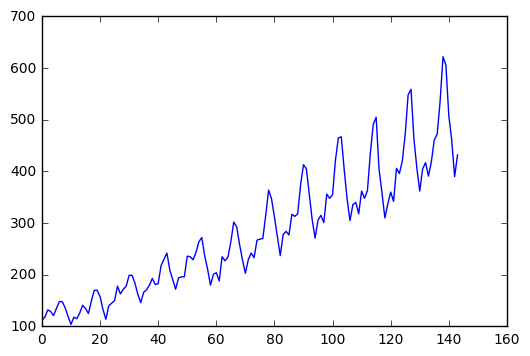

In [34]:
dataset = pd.read_csv( 'dat/international-airline-passengers.csv' , usecols=[1], engine= 'python' , skipfooter=3)
plt.plot(dataset)
plt.show()

In [35]:
dataset = dataset.values
dataset = dataset.astype('float32')
#split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(96, 48)


In [36]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [37]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [38]:
trainX[0:5], trainY[0:5]

(array([[ 112.],
        [ 118.],
        [ 132.],
        [ 129.],
        [ 121.]], dtype=float32),
 array([ 118.,  132.,  129.,  121.,  135.], dtype=float32))

### MLP
- 1->[8]->1

In [39]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 132247.7669
Epoch 2/200
0s - loss: 109890.7185
Epoch 3/200
0s - loss: 90957.2916
Epoch 4/200
0s - loss: 75826.3623
Epoch 5/200
0s - loss: 63719.6474
Epoch 6/200
0s - loss: 53175.4426
Epoch 7/200
0s - loss: 43960.5246
Epoch 8/200
0s - loss: 36070.6539
Epoch 9/200
0s - loss: 29092.7313
Epoch 10/200
0s - loss: 23196.1230
Epoch 11/200
0s - loss: 18215.6138
Epoch 12/200
0s - loss: 14055.6753
Epoch 13/200
0s - loss: 10629.6583
Epoch 14/200
0s - loss: 7921.8079
Epoch 15/200
0s - loss: 5798.6290
Epoch 16/200
0s - loss: 4199.9137
Epoch 17/200
0s - loss: 2994.7281
Epoch 18/200
0s - loss: 2154.6751
Epoch 19/200
0s - loss: 1563.7853
Epoch 20/200
0s - loss: 1171.7272
Epoch 21/200
0s - loss: 918.1132
Epoch 22/200
0s - loss: 759.8644
Epoch 23/200
0s - loss: 662.3085
Epoch 24/200
0s - loss: 606.0250
Epoch 25/200
0s - loss: 573.0750
Epoch 26/200
0s - loss: 554.0069
Epoch 27/200
0s - loss: 546.3175
Epoch 28/200
0s - loss: 539.5196
Epoch 29/200
0s - loss: 538.6329
Epoch 30/200
0s -

In [40]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( 'Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 531.39 MSE (23.05 RMSE)
Test Score: 2354.30 MSE (48.52 RMSE)


In [41]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

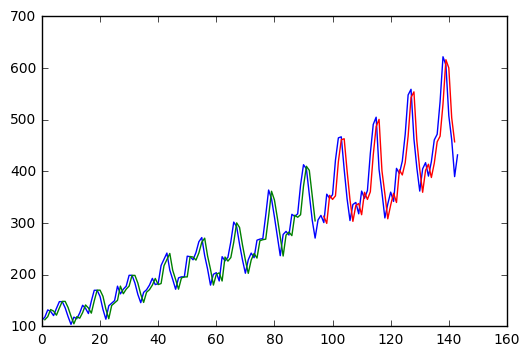

In [42]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### MLP with the Window Method

In [43]:
# reshape dataset
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 69682.5531
Epoch 2/200
0s - loss: 39349.6944
Epoch 3/200
0s - loss: 25677.0390
Epoch 4/200
0s - loss: 15689.9737
Epoch 5/200
0s - loss: 7936.9564
Epoch 6/200
0s - loss: 3586.4123
Epoch 7/200
0s - loss: 1939.7882
Epoch 8/200
0s - loss: 1527.1072
Epoch 9/200
0s - loss: 1458.1349
Epoch 10/200
0s - loss: 1454.6344
Epoch 11/200
0s - loss: 1445.5415
Epoch 12/200
0s - loss: 1438.9483
Epoch 13/200
0s - loss: 1438.1489
Epoch 14/200
0s - loss: 1433.2007
Epoch 15/200
0s - loss: 1438.5162
Epoch 16/200
0s - loss: 1439.5395
Epoch 17/200
0s - loss: 1477.0273
Epoch 18/200
0s - loss: 1416.8997
Epoch 19/200
0s - loss: 1416.4760
Epoch 20/200
0s - loss: 1411.6344
Epoch 21/200
0s - loss: 1404.9292
Epoch 22/200
0s - loss: 1406.8814
Epoch 23/200
0s - loss: 1395.6179
Epoch 24/200
0s - loss: 1399.1541
Epoch 25/200
0s - loss: 1385.0123
Epoch 26/200
0s - loss: 1396.3413
Epoch 27/200
0s - loss: 1375.0776
Epoch 28/200
0s - loss: 1385.8500
Epoch 29/200
0s - loss: 1397.0071
Epoch 30/200
0s - l

In [44]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( ' Train Score: %.2f MSE (%.2f RMSE) ' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( ' Test Score: %.2f MSE (%.2f RMSE) ' % (testScore, math.sqrt(testScore)))

 Train Score: 645.74 MSE (25.41 RMSE) 
 Test Score: 2781.37 MSE (52.74 RMSE) 


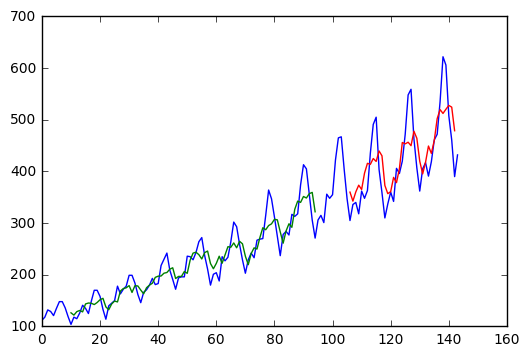

In [45]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### LSTM

In [46]:
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [47]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [48]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [49]:
trainX.shape

(94, 1)

In [50]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [51]:
trainX.shape

(94, 1, 1)

In [52]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
0s - loss: 0.0896
Epoch 2/100
0s - loss: 0.0449
Epoch 3/100
0s - loss: 0.0316
Epoch 4/100
0s - loss: 0.0276
Epoch 5/100
0s - loss: 0.0255
Epoch 6/100
0s - loss: 0.0238
Epoch 7/100
0s - loss: 0.0221
Epoch 8/100
0s - loss: 0.0204
Epoch 9/100
0s - loss: 0.0191
Epoch 10/100
0s - loss: 0.0177
Epoch 11/100
0s - loss: 0.0162
Epoch 12/100
0s - loss: 0.0150
Epoch 13/100
0s - loss: 0.0137
Epoch 14/100
0s - loss: 0.0124
Epoch 15/100
0s - loss: 0.0111
Epoch 16/100
0s - loss: 0.0101
Epoch 17/100
0s - loss: 0.0090
Epoch 18/100
0s - loss: 0.0080
Epoch 19/100
0s - loss: 0.0071
Epoch 20/100
0s - loss: 0.0063
Epoch 21/100
0s - loss: 0.0056
Epoch 22/100
0s - loss: 0.0049
Epoch 23/100
0s - loss: 0.0044
Epoch 24/100
0s - loss: 0.0039
Epoch 25/100
0s - loss: 0.0034
Epoch 26/100
0s - loss: 0.0031
Epoch 27/100
0s - loss: 0.0028
Epoch 28/100
0s - loss: 0.0026
Epoch 29/100
0s - loss: 0.0025
Epoch 30/100
0s - loss: 0.0024
Epoch 31/100
0s - loss: 0.0023
Epoch 32/100
0s - loss: 0.0023
Epoch 33/100
0s -

In [53]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [54]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print( ' Train Score: %.2f RMSE ' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print( ' Test Score: %.2f RMSE ' % (testScore))

 Train Score: 23.39 RMSE 
 Test Score: 48.95 RMSE 


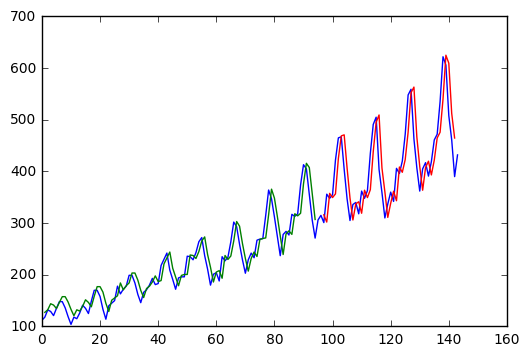

In [55]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### LSTM using the Window Method

In [56]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [57]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [58]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, nb_epoch=600, batch_size=1, verbose=0)

In [59]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print( ' Train Score: %.2f RMSE ' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print( ' Test Score: %.2f RMSE ' % (testScore))

 Train Score: 15.30 RMSE 
 Test Score: 54.28 RMSE 


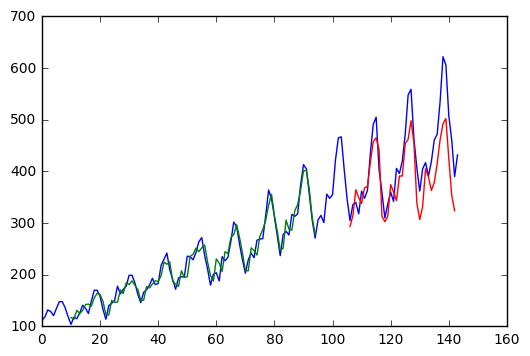

In [60]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()